# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

## Loading the dataset

In [65]:
df = pd.read_csv('/Users/nadiyazaver/Downloads/used_device_data.csv')
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

In [66]:
df.shape

(3454, 15)

In [67]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [68]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [7]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [77]:
numerical_columns = df.select_dtypes(include=['float64','int64'])
numerical_columns

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...
3449,15.34,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


<Figure size 2880x2880 with 0 Axes>

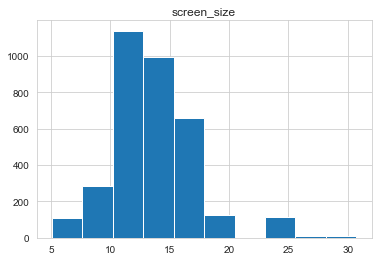

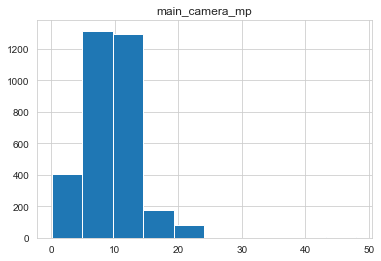

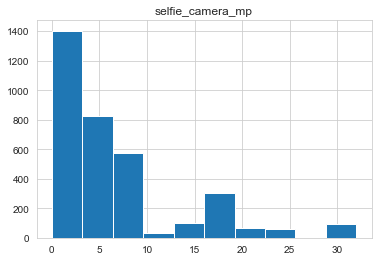

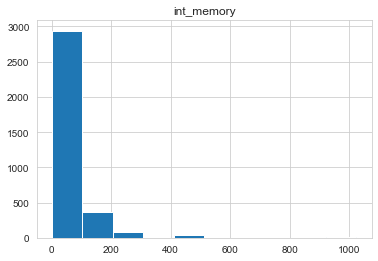

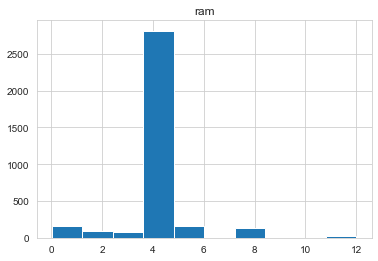

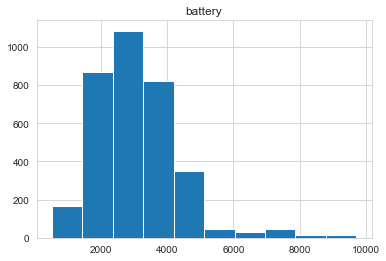

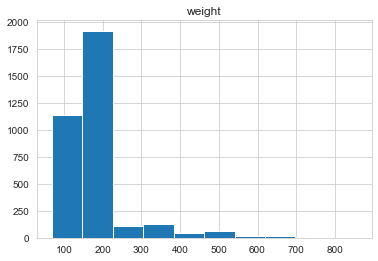

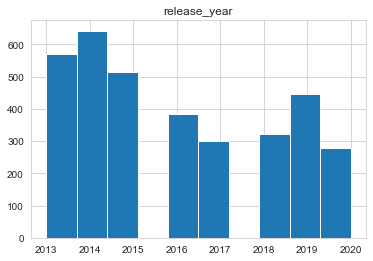

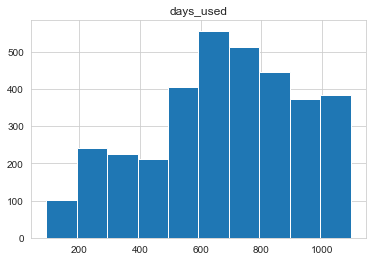

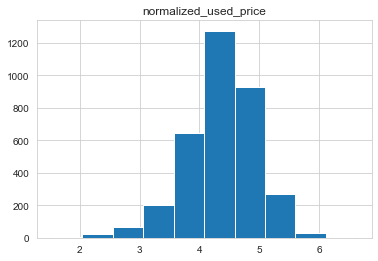

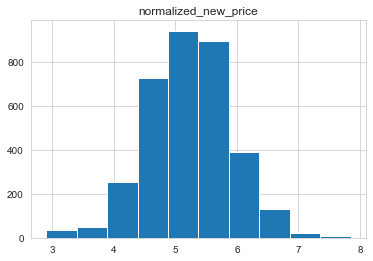

In [83]:
plt.figure(figsize=(40,40))
for x in numerical_columns.columns:
    numerical_columns.hist(column = x)



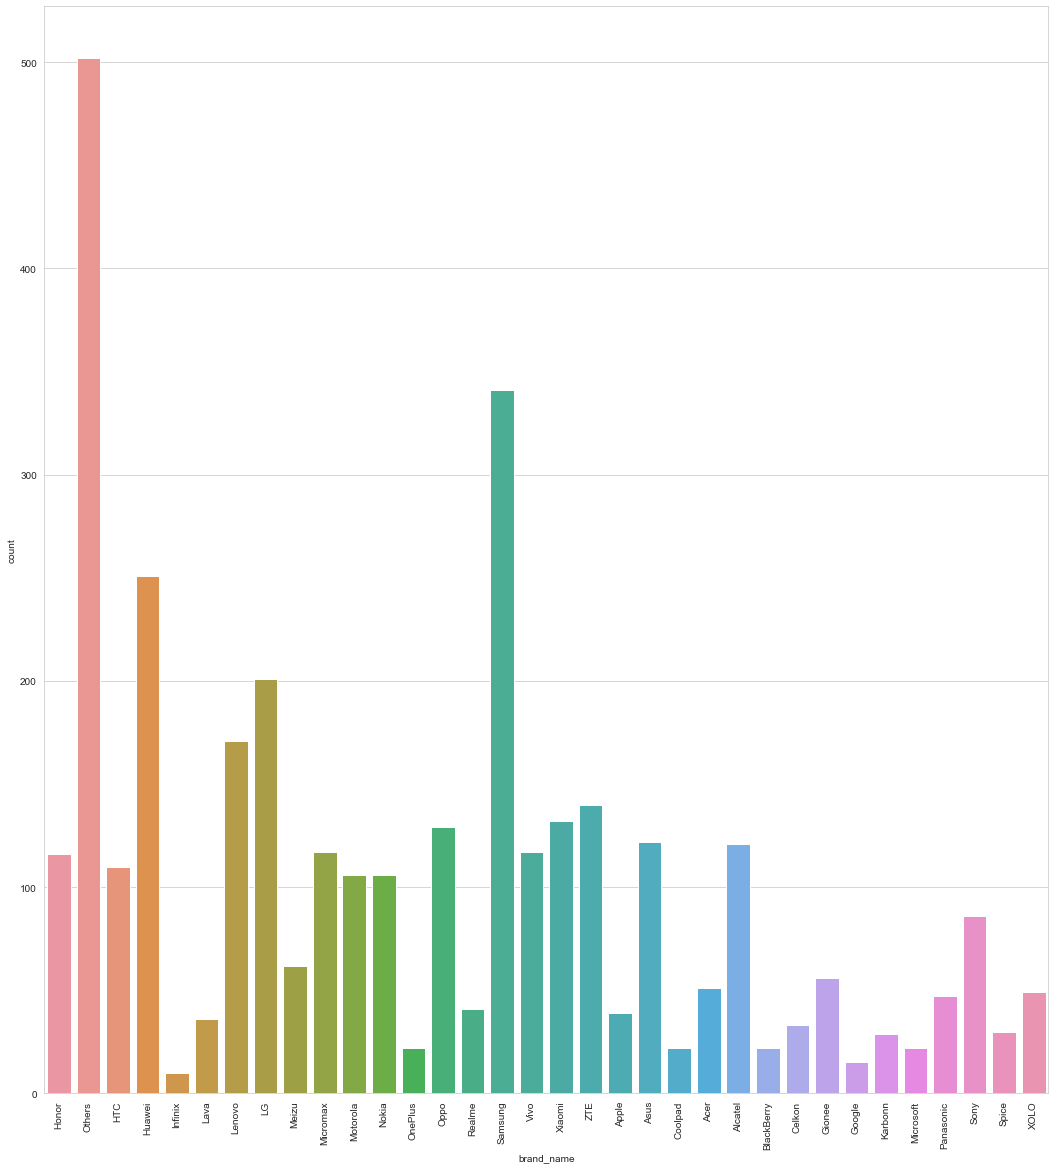

In [87]:
plt.figure(figsize = (18,20))
sns.countplot(data = df, x = 'brand_name')
plt.xticks(rotation = 90);

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

1. What does the distribution of normalized used device prices look like?

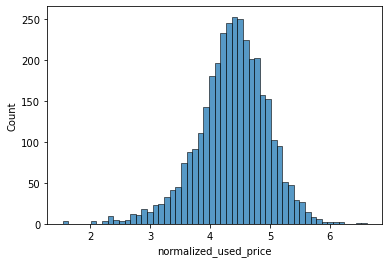

In [8]:
sns.histplot(data = df, x = 'normalized_used_price');
#The normalized used price has a normal distribution

In [9]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

2. What percentage of the used device market is dominated by Android devices?

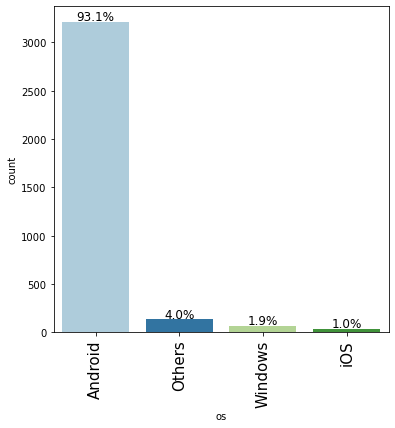

In [10]:
labeled_barplot(df, 'os', perc = True);

3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

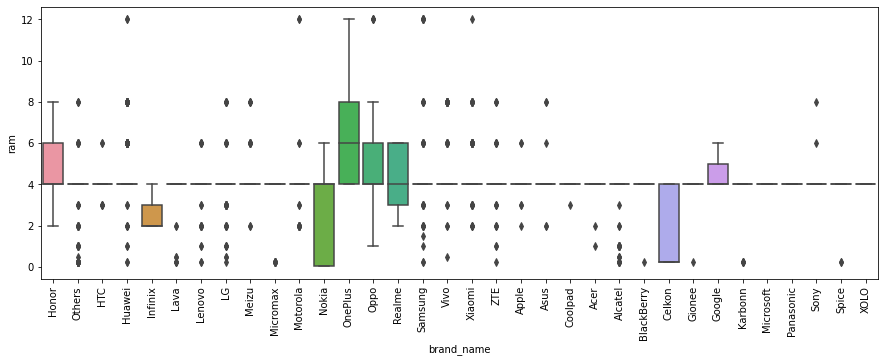

In [11]:
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'brand_name', y = 'ram')
plt.xticks(rotation = 90)
plt.show()

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?


In [12]:
batteries_4500 = df[df['battery'] > 4500]

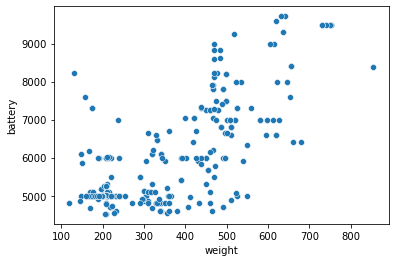

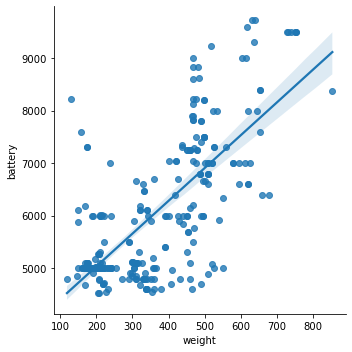

In [13]:
sns.scatterplot(data = batteries_4500, x = 'weight', y = 'battery');
sns.lmplot(data = batteries_4500, x = 'weight', y = 'battery');
#As weight increases, the battery size increases

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

97.34 % screen sizes are larger than 6 inches


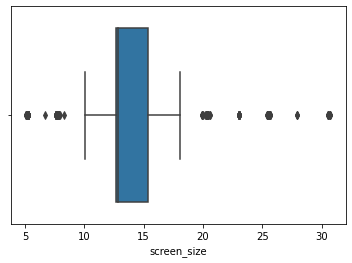

In [14]:
larger_than_6 = df[df['screen_size']>6]
row1 = (larger_than_6.shape[0]*100)/df.shape[0]
print(round(row1,2),"% screen sizes are larger than 6 inches")
sns.boxplot(data = df, x = 'screen_size');

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

18.96 % of selfie camera mp are larger than 8MP


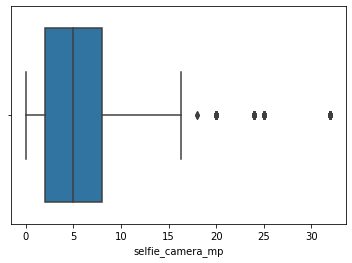

In [15]:
greater_than_8mp = df[df['selfie_camera_mp']>8]
row2 = (greater_than_8mp.shape[0]*100)/df.shape[0]
print(round(row2,2), "% of selfie camera mp are larger than 8MP")
sns.boxplot(data = df, x = 'selfie_camera_mp');

7. Which attributes are highly correlated with the normalized price of a used device?

In [16]:
num_col = df.select_dtypes(exclude = 'object' ).corr()

<AxesSubplot:>

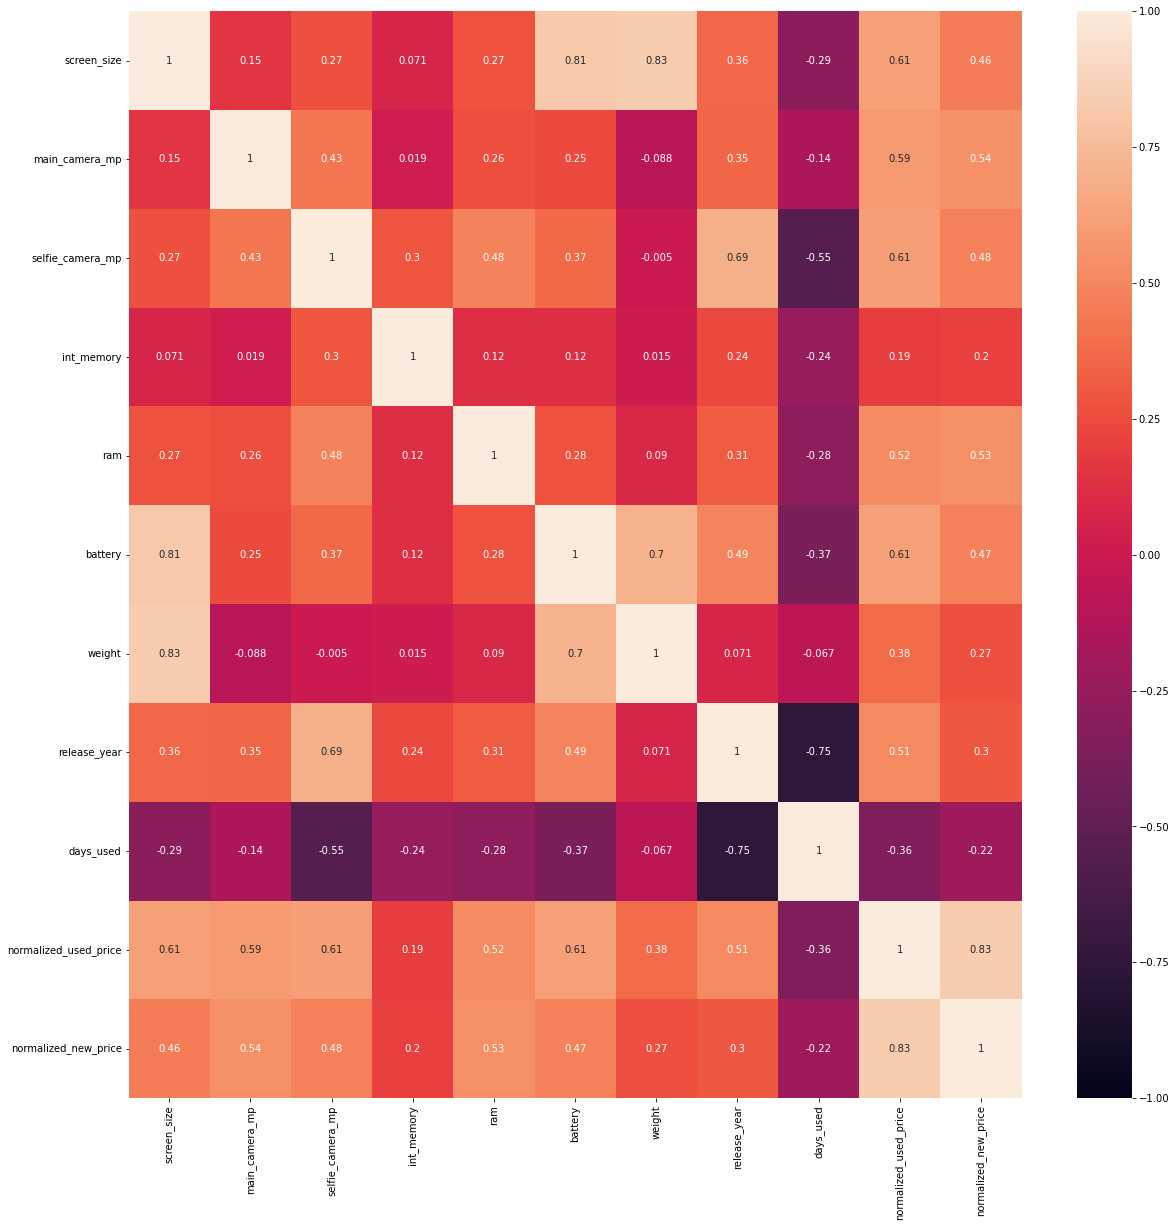

In [17]:
plt.figure(figsize = (20,20))
sns.heatmap(num_col, annot = True, vmin = -1, vmax = 1)
#Normalized price of used device has a high correlation with screen size, selfie camera mp, main camera mp, battery and normalized new price

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [18]:
df1 = df.copy()

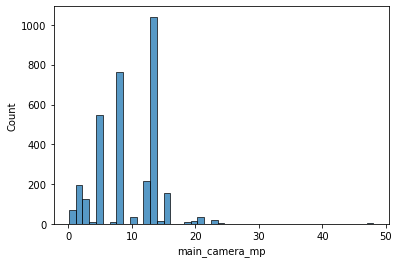

In [19]:
sns.histplot(df1 , x = 'main_camera_mp');

In [20]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median"))

In [21]:
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [22]:
df1.dropna(axis = 0, inplace = True)

In [23]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [24]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3444.000000
mean        5.045296
std         2.293263
min         1.000000
25%         3.000000
50%         6.000000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

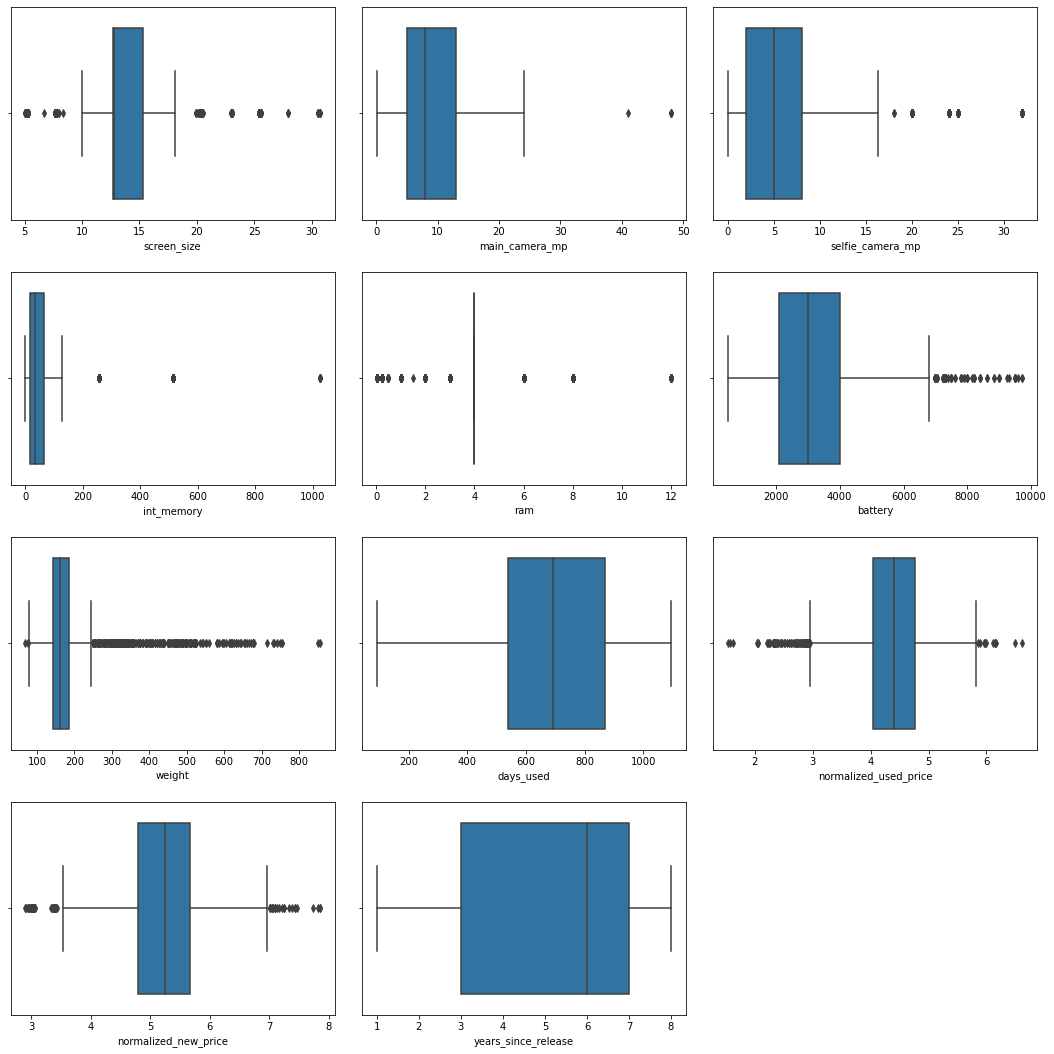

In [25]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [26]:
num_col1 = df1.select_dtypes(exclude = 'object' ).corr()

<AxesSubplot:>

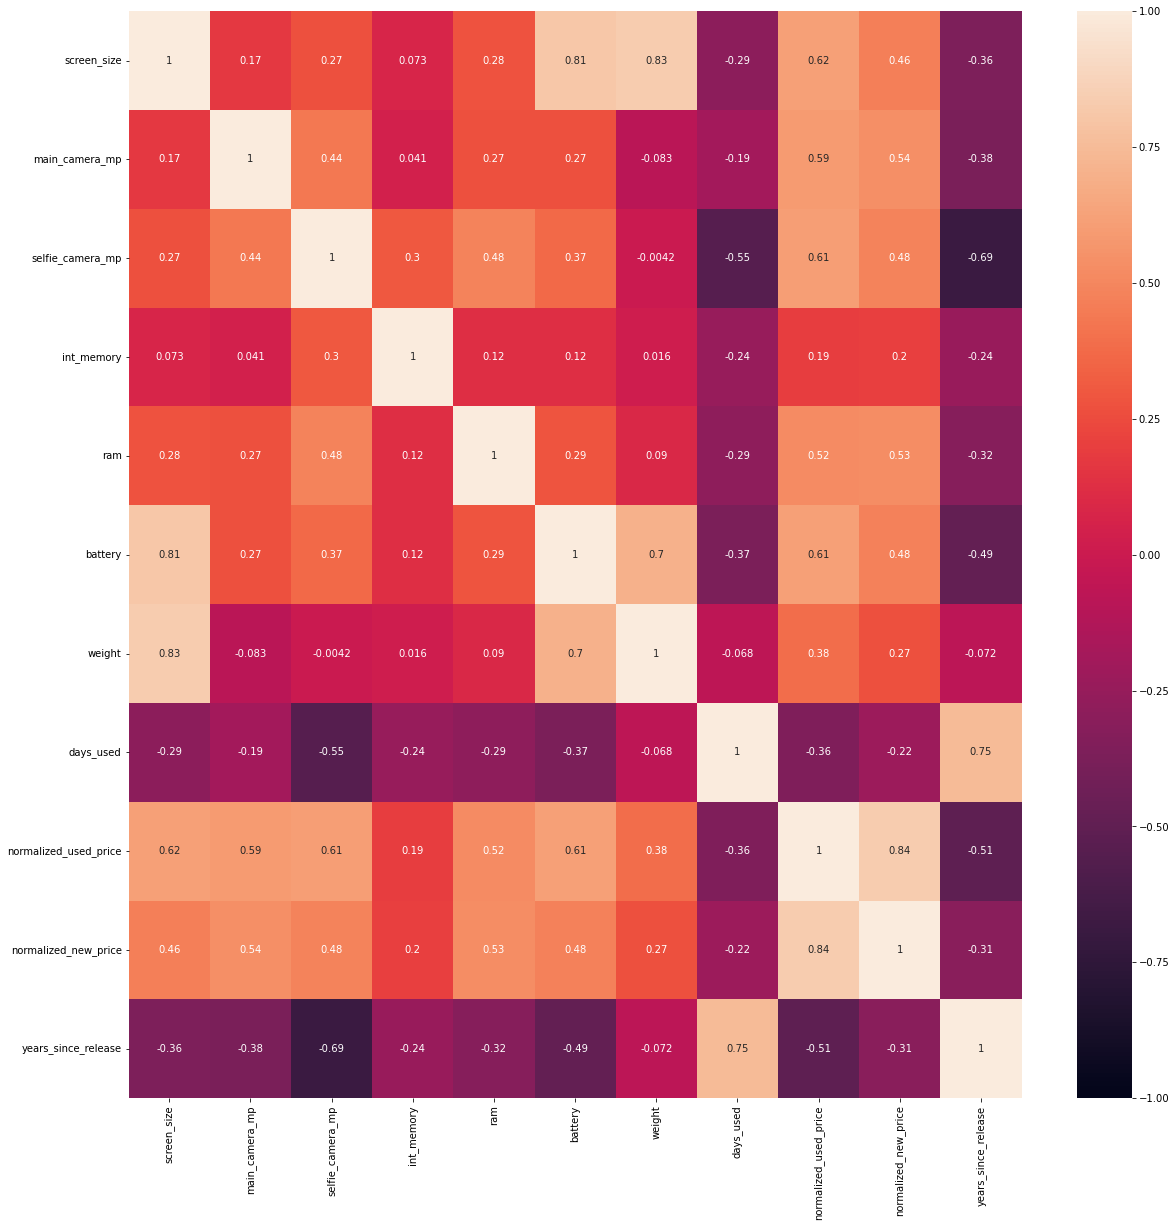

In [27]:
plt.figure(figsize = (20,20))
sns.heatmap(num_col1, annot = True, vmin = -1, vmax = 1)

## Model Building - Linear Regression

In [28]:
X = df1.drop(['normalized_used_price'], axis = 1)
y = df1[['normalized_used_price']]

In [29]:
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [30]:
y.head()

,normalized_used_price
0,4.307572
1,5.162097
2,5.111084
3,5.135387
4,4.389995


In [31]:
X = sm.add_constant(X)

In [32]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 1)

In [34]:
X_train.shape

(2410, 48)

In [35]:
X_test.shape

(1034, 48)

In [36]:
olsmodel1 = sm.OLS(y_train, X_train)
olsres = olsmodel1.fit()

## Model Performance Check

In [37]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     275.8
Date:                   Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                           20:11:31   Log-Likelihood:                 80.997
No. Observations:                   2410   AIC:                            -65.99
Df Residuals:                       2362   BIC:                             211.8
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif_series1 = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],
                       index = X_train.columns,
                       )

print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    218.795249
screen_size                7.729621
main_camera_mp             2.330059
selfie_camera_mp           2.891093
int_memory                 1.372100
ram                        2.270635
battery                    4.610533
weight                     6.089586
days_used                  2.559045
normalized_new_price       3.118523
years_since_release        4.700433
brand_name_Alcatel         3.251978
brand_name_Apple          12.932488
brand_name_Asus            3.283658
brand_name_BlackBerry      1.548662
brand_name_Celkon          1.665582
brand_name_Coolpad         1.490756
brand_name_Gionee          1.970378
brand_name_Google          1.177118
brand_name_HTC             3.082566
brand_name_Honor           3.200004
brand_name_Huawei          5.632981
brand_name_Karbonn         1.638957
brand_name_LG              4.768771
brand_name_Lava            1.640449
brand_name_Lenovo          4.339403
brand_name_Meizu           2.237106
brand_name_Mic

In [40]:
X_train2 = X_train.drop(['screen_size'], axis = 1)
olsmod_1 =sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()

print(
        "R-squared:",
         np.round(olsres_1.rsquared,3),
         "\nAdjusted R-squared:",
         np.round(olsres_1.rsquared_adj,3),
)

R-squared: 0.842 
Adjusted R-squared: 0.839


In [41]:
X_train3 = X_train.drop(['weight'], axis =1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()

print(
        "R-squared:",
        np.round(olsres_2.rsquared,3),
        "\nAdjusted R-squared:",
        np.round(olsres_2.rsquared_adj,3),
)

R-squared: 0.842 
Adjusted R-squared: 0.839


In [42]:
X_train = X_train.drop(['screen_size'], axis = 1)

In [43]:
olsmod_8 = sm.OLS(y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     274.1
Date:                   Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                           20:11:31   Log-Likelihood:                 52.246
No. Observations:                   2410   AIC:                            -10.49
Df Residuals:                       2363   BIC:                             261.5
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [44]:
vif_series3 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])],
                       index = X_train.columns,
)

print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                    195.846716
main_camera_mp             2.326224
selfie_camera_mp           2.887472
int_memory                 1.366984
ram                        2.269597
battery                    4.153608
weight                     3.206289
days_used                  2.550111
normalized_new_price       3.082812
years_since_release        4.571144
brand_name_Alcatel         3.251294
brand_name_Apple          12.874109
brand_name_Asus            3.277959
brand_name_BlackBerry      1.547326
brand_name_Celkon          1.664706
brand_name_Coolpad         1.489892
brand_name_Gionee          1.962885
brand_name_Google          1.175997
brand_name_HTC             3.076841
brand_name_Honor           3.199934
brand_name_Huawei          5.630769
brand_name_Karbonn         1.638890
brand_name_LG              4.755600
brand_name_Lava            1.640449
brand_name_Lenovo          4.335908
brand_name_Meizu           2.234127
brand_name_Micromax        3.237207
brand_name_Mic

In [45]:
olsmod_9 = sm.OLS(y_train, X_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     274.1
Date:                   Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                           20:11:32   Log-Likelihood:                 52.246
No. Observations:                   2410   AIC:                            -10.49
Df Residuals:                       2363   BIC:                             261.5
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [46]:
X_train8 = X_train.drop(['days_used'], axis = 1)
olsmod_10 = sm.OLS(y_train, X_train8)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     280.3
Date:                   Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                           20:11:32   Log-Likelihood:                 52.244
No. Observations:                   2410   AIC:                            -12.49
Df Residuals:                       2364   BIC:                             253.7
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [47]:
X_train9 = X_train.drop(['int_memory', 'days_used', 'battery'], axis = 1)
olsmod_11 = sm.OLS(y_train, X_train9)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     293.4
Date:                   Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                           20:11:32   Log-Likelihood:                 51.735
No. Observations:                   2410   AIC:                            -15.47
Df Residuals:                       2366   BIC:                             239.2
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [48]:
df_pred = pd.DataFrame()

df_pred['Actual Values'] = y_train.values.flatten() #actual values
df_pred['Fitted Values'] = olsres_11.fittedvalues.values #predicted values
df_pred['Residuals'] = olsres_11.resid.values

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.034241,4.185025,-0.150784
1,4.487062,4.741880,-0.254818
2,4.029095,4.208708,-0.179613
3,4.004237,4.020730,-0.016492
4,4.558288,4.583229,-0.024941


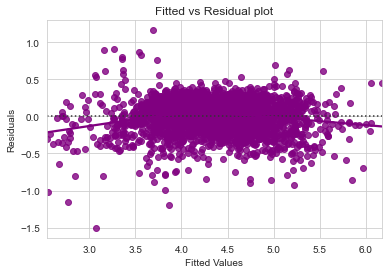

In [49]:
sns.set_style('whitegrid')
sns.residplot(
data = df_pred, x = 'Fitted Values', y ='Residuals', color = 'purple', lowess = True)

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title("Fitted vs Residual plot")
plt.show()

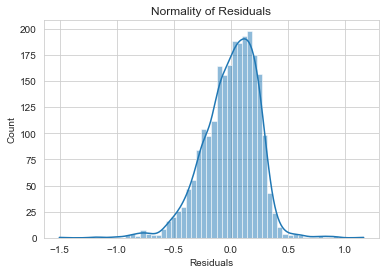

In [50]:
sns.histplot(df_pred['Residuals'], kde = True)
plt.title('Normality of Residuals')
plt.show()

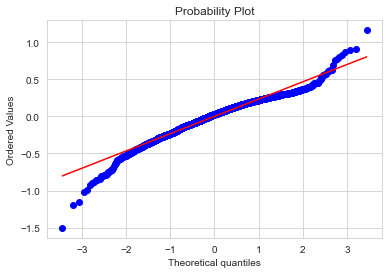

In [51]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist = 'norm', plot = pylab)
plt.show()

In [52]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.965896725654602, pvalue=1.8985748908782037e-23)

## Final Model

In [53]:
X_train9 = X_train.drop(['int_memory', 'days_used', 'battery'], axis = 1)
olsmod_11 = sm.OLS(y_train, X_train9)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     293.4
Date:                   Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                           20:11:34   Log-Likelihood:                 51.735
No. Observations:                   2410   AIC:                            -15.47
Df Residuals:                       2366   BIC:                             239.2
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [54]:
Equation = 'normalized_used_price='
print(Equation, end ='')
for i in range (len(X_train9.columns)):
    if i ==0:
        print(olsres_11.params[i], "+", end="")
    elif i != len(X_train9.columns) - 1:
        print(
        olsres_11.params[i],
        "*(",
        X_train9.columns[i],
        ")",
        "+",
        end = "",
        )
    else:
        print(olsres_11.params[i], "*(", X_train9.columns[i],")")
        

normalized_used_price=1.451703357753237 +0.020747841817943848 *( main_camera_mp ) +0.013104907318800377 *( selfie_camera_mp ) +0.024557846138149486 *( ram ) +0.0016526223668050085 *( weight ) +0.4498532432321518 *( normalized_new_price ) +-0.03000127266903828 *( years_since_release ) +0.013356852761476658 *( brand_name_Alcatel ) +0.05882517346409788 *( brand_name_Apple ) +0.011371973859555962 *( brand_name_Asus ) +0.1047929818459411 *( brand_name_BlackBerry ) +-0.08153792078054545 *( brand_name_Celkon ) +0.02218328518007795 *( brand_name_Coolpad ) +-0.0025861660248549523 *( brand_name_Gionee ) +0.013004544865815815 *( brand_name_Google ) +-0.014436619256638417 *( brand_name_HTC ) +0.024269508810321416 *( brand_name_Honor ) +-0.00027618134033785546 *( brand_name_Huawei ) +0.02463213527103364 *( brand_name_Karbonn ) +-0.022790137491017215 *( brand_name_LG ) +0.07129580384481571 *( brand_name_Lava ) +0.022835985186824836 *( brand_name_Lenovo ) +-0.011185331536692322 *( brand_name_Meizu ) 

In [55]:
X_train9.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight',
       'normalized_new_price', 'years_since_release', 'brand_name_Alcatel',
       'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry',
       'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee',
       'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor',
       'brand_name_Huawei', 'brand_name_Karbonn', 'brand_name_LG',
       'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
       'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola',
       'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo',
       'brand_name_Others', 'brand_name_Panasonic', 'brand_name_Realme',
       'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice',
       'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi',
       'brand_name_ZTE', 'os_Others', 'os_Windows', 'os_iOS', '4g_yes',
       '5g_yes'],
      dtype='object')

In [56]:
X_test.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'years_since_release', 'brand_name_Alcatel',
       'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry',
       'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee',
       'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor',
       'brand_name_Huawei', 'brand_name_Karbonn', 'brand_name_LG',
       'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
       'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola',
       'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo',
       'brand_name_Others', 'brand_name_Panasonic', 'brand_name_Realme',
       'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice',
       'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi',
       'brand_name_ZTE', 'os_Others', 'os_Windows', 'os_iOS', '4g_yes',
       '5g_yes'],
      dty

In [57]:
X_test2 = X_test.drop(['int_memory', 'days_used', 'battery', 'screen_size'], axis = 1)

In [58]:
y_pred = olsres_11.predict(X_test2)

In [59]:
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred['Fitted Values']))

In [60]:
rmse1

0.2368317633706115

In [61]:
rmse2 = np.sqrt(mean_squared_error(y_test,y_pred))
rmse2

0.23249056540390256

In [62]:
mae1 = mean_absolute_error(y_train, df_pred['Fitted Values'])
mae1

0.18365323154826718

In [63]:
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.18162973935959006

## Actionable Insights and Recommendations 


- The normalized new price has the most impact on the normalized used price

- Ram and main camera mp also have an impact on the normalized used price

- Android is the most popular in its category of os

- Samsung is the most popular in its category of brand

- Selfie camera mp and years since release have a high negative correlation 

- Promote scarcity and limited time sale on older products

- Offer membership reward promotion to ensure customer retainment

___